In [8]:
!pip install wordcloud

In [13]:
# 한글 문장 리스트
sentences = [
    "이 영화 너무 재밌어요!",
    "배우들의 연기력이 정말 뛰어나네요.",
    "스토리가 진짜 감동적이에요.",
    "음악도 너무 좋아서 몰입감이 굉장해요.",
    "영상미가 아름답고 세련되었습니다.",
    "전체적으로 흥미로운 영화였습니다.",
    "감독의 연출력이 탁월하네요.",
    "시간 가는 줄 모르고 봤어요!",
    "배경 음악 선택도 완벽했습니다.",
    "주인공들의 케미가 최고에요!",
    "기대 이상으로 재미있었습니다.",
    "꼭 추천하고 싶은 작품입니다.",
    "재미와 감동을 동시에 주는 영화였어요.",
    "한 번 보면 두 번 보고 싶은 영화입니다.",
]

In [11]:
from wordcloud import WordCloud

In [23]:
### 조사 빼기
# 은,는,이,가,부터,조차,까지,요,마저 ..... 
import re
pattern = r'[줄번]'
text_regex = re.sub(pattern=pattern, repl='', string=text) # params : 변경대상, 대상 대체, 어떤것을
text_regex

'이 영화 너무 재밌어요! 배우들의 연기력이 정말 뛰어나네요. 스토리가 진짜 감동적이에요. 음악도 너무 좋아서 몰입감이 굉장해요. 영상미가 아름답고 세련되었습니다. 전체적으로 흥미로운 영화였습니다. 감독의 연출력이 탁월하네요. 시간 가는  모르고 봤어요! 배경 음악 선택도 완벽했습니다. 주인공들의 케미가 최고에요! 기대 이상으로 재미있었습니다. 꼭 추천하고 싶은 작품입니다. 재미와 감동을 동시에 주는 영화였어요. 한  보면 두  보고 싶은 영화입니다.'

## 자연어 처리 위한 형태분석기 적용

In [48]:
from mecab import MeCab
mecab = MeCab()

In [12]:
#"맛있는 음식을 먹으러 갈까요?", ->4개 
#"여행 계획을 세우고 있는데 어디로 갈까요?",->6개
# 갈까요?10개이지만 동일한 단어는 겹칠 수 있다. 
text = ' '.join(sentences) #리스트를 join 하나의 단어가 나열. 
text

'이 영화 너무 재밌어요! 배우들의 연기력이 정말 뛰어나네요. 스토리가 진짜 감동적이에요. 음악도 너무 좋아서 몰입감이 굉장해요. 영상미가 아름답고 세련되었습니다. 전체적으로 흥미로운 영화였습니다. 감독의 연출력이 탁월하네요. 시간 가는 줄 모르고 봤어요! 배경 음악 선택도 완벽했습니다. 주인공들의 케미가 최고에요! 기대 이상으로 재미있었습니다. 꼭 추천하고 싶은 작품입니다. 재미와 감동을 동시에 주는 영화였어요. 한 번 보면 두 번 보고 싶은 영화입니다.'

In [25]:
mecab.nouns(sentences[0]), mecab.nouns(sentences[1]), mecab.nouns(sentences[0]) + mecab.nouns(sentences[1]) # mecab.pos(sentences[0])

(['영화'], ['배우', '연기력'], ['영화', '배우', '연기력'])

In [27]:
# 형태분석기 사용해 명사만 추출
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs
morphs_list    

['영화',
 '배우',
 '연기력',
 '스토리',
 '감동',
 '음악',
 '입감',
 '영상미',
 '전체',
 '흥미',
 '영화',
 '감독',
 '연출력',
 '시간',
 '줄',
 '배경',
 '음악',
 '선택',
 '완벽',
 '주인공',
 '케미',
 '최고',
 '기대',
 '이상',
 '추천',
 '작품',
 '재미',
 '감동',
 '동시',
 '영화',
 '번',
 '번',
 '영화']

In [41]:
#"맛있는 음식을 먹으러 갈까요?", ->4개 
#"여행 계획을 세우고 있는데 어디로 갈까요?",->6개
# 갈까요?10개이지만 동일한 단어는 겹칠 수 있다. 
text = ' '.join(morphs_list) #리스트를 join 하나의 단어가 나열. 
text

'영화 배우 연기력 스토리 감동 음악 입감 영상미 전체 흥미 영화 감독 연출력 시간 줄 배경 음악 선택 완벽 주인공 케미 최고 기대 이상 추천 작품 재미 감동 동시 영화 번 번 영화'

In [42]:
### 조사 빼기
# 은,는,이,가,부터,조차,까지,요,마저 ..... 
import re
pattern = r'[줄번]'
text_regex = re.sub(pattern=pattern, repl='', string=text) # params : 변경대상, 대상 대체, 어떤것을
text_regex

'영화 배우 연기력 스토리 감동 음악 입감 영상미 전체 흥미 영화 감독 연출력 시간  배경 음악 선택 완벽 주인공 케미 최고 기대 이상 추천 작품 재미 감동 동시 영화   영화'

In [52]:
from collections import Counter
nouns_count = Counter(text_regex)
nouns_count

Counter({'영': 5,
         '화': 4,
         ' ': 32,
         '배': 2,
         '우': 1,
         '연': 2,
         '기': 2,
         '력': 2,
         '스': 1,
         '토': 1,
         '리': 1,
         '감': 4,
         '동': 3,
         '음': 2,
         '악': 2,
         '입': 1,
         '상': 2,
         '미': 4,
         '전': 1,
         '체': 1,
         '흥': 1,
         '독': 1,
         '출': 1,
         '시': 2,
         '간': 1,
         '경': 1,
         '선': 1,
         '택': 1,
         '완': 1,
         '벽': 1,
         '주': 1,
         '인': 1,
         '공': 1,
         '케': 1,
         '최': 1,
         '고': 1,
         '대': 1,
         '이': 1,
         '추': 1,
         '천': 1,
         '작': 1,
         '품': 1,
         '재': 1})

In [53]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(nouns_count)

In [54]:
wordCloud.words_

{' ': 1.0,
 '영': 0.15625,
 '화': 0.125,
 '감': 0.125,
 '미': 0.125,
 '동': 0.09375,
 '배': 0.0625,
 '연': 0.0625,
 '기': 0.0625,
 '력': 0.0625,
 '음': 0.0625,
 '악': 0.0625,
 '상': 0.0625,
 '시': 0.0625,
 '우': 0.03125,
 '스': 0.03125,
 '토': 0.03125,
 '리': 0.03125,
 '입': 0.03125,
 '전': 0.03125,
 '체': 0.03125,
 '흥': 0.03125,
 '독': 0.03125,
 '출': 0.03125,
 '간': 0.03125,
 '경': 0.03125,
 '선': 0.03125,
 '택': 0.03125,
 '완': 0.03125,
 '벽': 0.03125,
 '주': 0.03125,
 '인': 0.03125,
 '공': 0.03125,
 '케': 0.03125,
 '최': 0.03125,
 '고': 0.03125,
 '대': 0.03125,
 '이': 0.03125,
 '추': 0.03125,
 '천': 0.03125,
 '작': 0.03125,
 '품': 0.03125,
 '재': 0.03125}

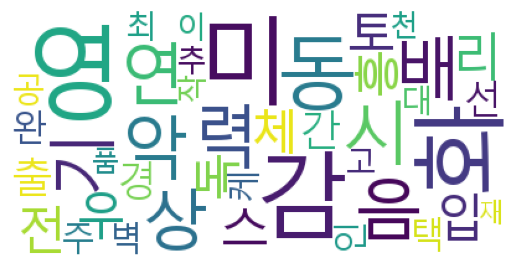

In [55]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()